In [2]:
import pandas as pd
import numpy as np
import os

In [4]:
os.chdir(r'C:\Users\aravi\Desktop\Aravi\Data Scientist\Great Lakes DSE\Materials\Week 10 - Classification\Day1\Logistic_reg')

In [5]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Selecting features

In [6]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = data[feature_cols] # Features
y = data['Outcome']

## Data split

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Logistic regression

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

In [9]:
# instantiate the model
logreg = LogisticRegression()

In [10]:
# fit the model with data
logreg.fit(X_train,y_train)

C:\Users\aravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred=logreg.predict(X_test)

### Model evaluation

In [12]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

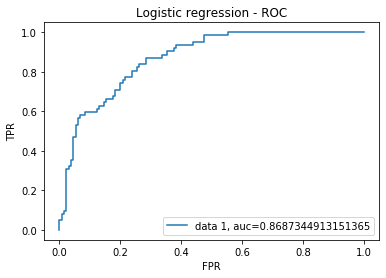

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic regression - ROC")
plt.legend(loc=4)
plt.show()